# tests for ESA CCI biomass UDP (User Defined Processes)

In [1]:
import openeo

In [2]:
# additional imports for visualization and checks
from shapely.geometry import shape
import rasterio
from rasterio.plot import show, show_hist
from matplotlib import pyplot

In [3]:
# establish connection to OpenEO and authenticate
connection = openeo.connect("openeo.vito.be").authenticate_oidc()

Authenticated using refresh token.


In [4]:
# specify the geometry --> here small bbox next to TAP (VITO, Belgien)
polygon =  {"type": "Polygon", 
            "coordinates": [
                [[5.03, 51.22], [5.05, 51.22], [5.05, 51.2], [5.03, 51.2], [5.03, 51.22]
            ]]
           }

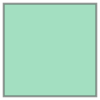

In [5]:
# show the extent
shape(polygon)

## CCI biomass dataset in original resolution and projection for year 2019

In [6]:
cube = connection.datacube_from_process(
    process_id="udp_biomass_cci-v4",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_biomass_cci-v4.json",
    geometry=polygon,   
    year=2019)

In [7]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./biomass_2019_100m.tif')

Wall time: 11.4 s


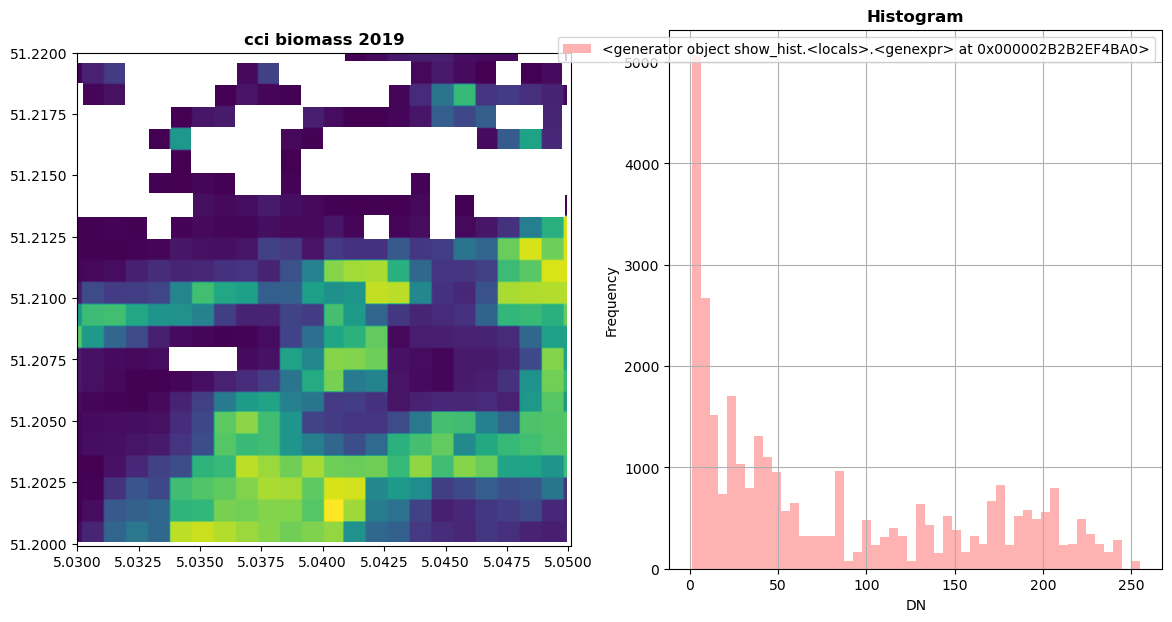

In [8]:
# visu result
with rasterio.open("biomass_2019_100m.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='cci biomass 2019')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## reprojected biomass datasets (EPSG: 3035, 100m  spatial resolution)

In [9]:
cube1 = connection.datacube_from_process(
    process_id="udp_biomass_cci-v4",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_biomass_cci-v4.json",
    geometry=polygon,   
    year=2019,
    output_warp=True,
    output_epsg=3035,
    resolution=100,
    band='AGB')

cube2 = connection.datacube_from_process(
    process_id="udp_biomass_cci-v4",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_biomass_cci-v4.json",
    geometry=polygon,   
    year=2019,
    output_warp=True,
    output_epsg=3035,
    resolution=100,
    band='SD')

In [10]:
# get datasets
%time cube1.download(r'./biomass_2019_EPSG4326.tif')
%time cube2.download(r'./biomass-sd_2019_EPSG4326.tif')

Wall time: 13.2 s
Wall time: 17.6 s


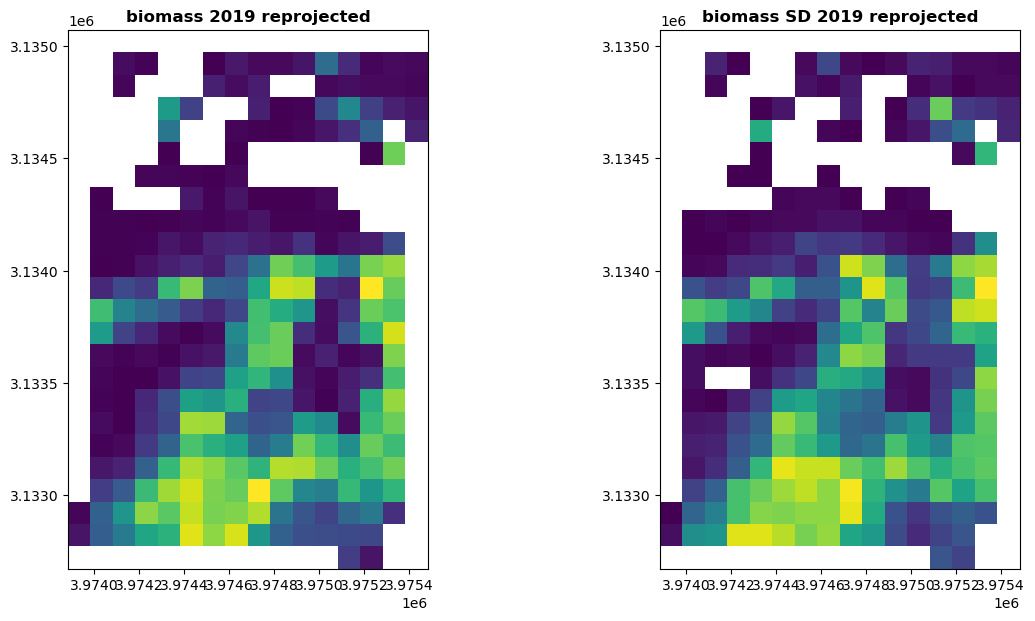

In [11]:
# visu result
with rasterio.open("biomass_2019_EPSG4326.tif") as src, rasterio.open("biomass-sd_2019_EPSG4326.tif") as src2:
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=ax1, title='biomass 2019 reprojected')
    show(src2, with_bounds=True, ax=ax2, title='biomass SD 2019 reprojected')
    pyplot.show()